In [23]:
import pandas as pd
import numpy as np
import plotly.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

In [24]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }


# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]


# Prediction Visualizations (enrich vs burnup)

## Low burnup data set

In [52]:
trainXY = pd.read_pickle("../pkl_trainsets/2jul2018/2jul2018_trainset1_nucs_fissact_not-scaled.pkl")

In [53]:
rxtr_name = 'Reactor Type'
trainXY[rxtr_name] = trainXY['ReactorType']

enr_name = 'Enrichment [% U235]'
trainXY[enr_name] = trainXY['Enrichment']

burn_name = 'Burnup [GWd/MTU]'
trainXY[burn_name] = trainXY['Burnup']//1000

cool_name = 'Cooling Time [days]'
trainXY[cool_name] = trainXY['CoolingTime']

In [54]:
#x = len(trainXY.columns)-4
## if labels are @ end of df
#dfX = trainXY.iloc[:, 5:x]
#dfY_r = trainXY.iloc[:, x]
#dfY_c = trainXY.iloc[:, x+1]
#dfY_e = trainXY.iloc[:, x+2]
#dfY_b = trainXY.iloc[:, x+3]
#dfX.head()

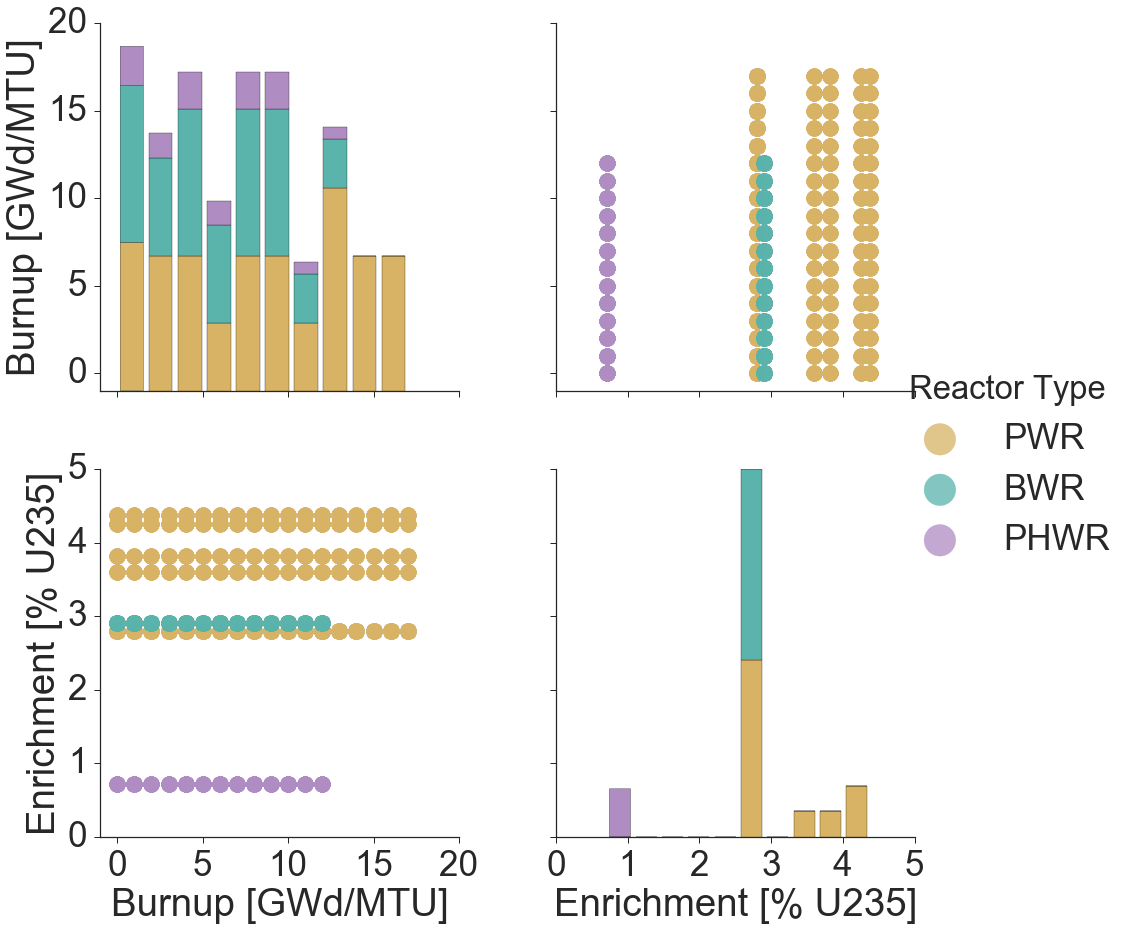

In [55]:
plt.clf()
train = trainXY[[burn_name, enr_name, rxtr_name]]
g = sns.set(style="ticks", font_scale=3.5)
g = sns.PairGrid(train, hue=rxtr_name, palette=sns.color_palette(med), 
                 diag_sharey=False, size=7)
g.map_diag(plt.hist, edgecolor="k")
g.map_offdiag(plt.scatter, s=250, alpha=0.75)
g.axes[0,0].set_ylim(-1, 20)
g.axes[1,0].set_xlim(-1, 20)
g.add_legend(markerscale=2)
new_labels = ['PWR', 'BWR', 'PHWR']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.savefig('1train_set.png', bbox_inches='tight', transparent=True)

## SFCOMPO data set

In [56]:
trainXY = pd.read_pickle("../pkl_trainsets/2jul2018/2jul2018_trainset2_nucs_fissact_not-scaled.pkl")

In [57]:
rxtr_name = 'Reactor Type'
trainXY[rxtr_name] = trainXY['ReactorType']

enr_name = 'Enrichment [% U235]'
trainXY[enr_name] = trainXY['Enrichment']

burn_name = 'Burnup [GWd/MTU]'
trainXY[burn_name] = trainXY['Burnup']//1000

cool_name = 'Cooling Time [days]'
trainXY[cool_name] = trainXY['CoolingTime']

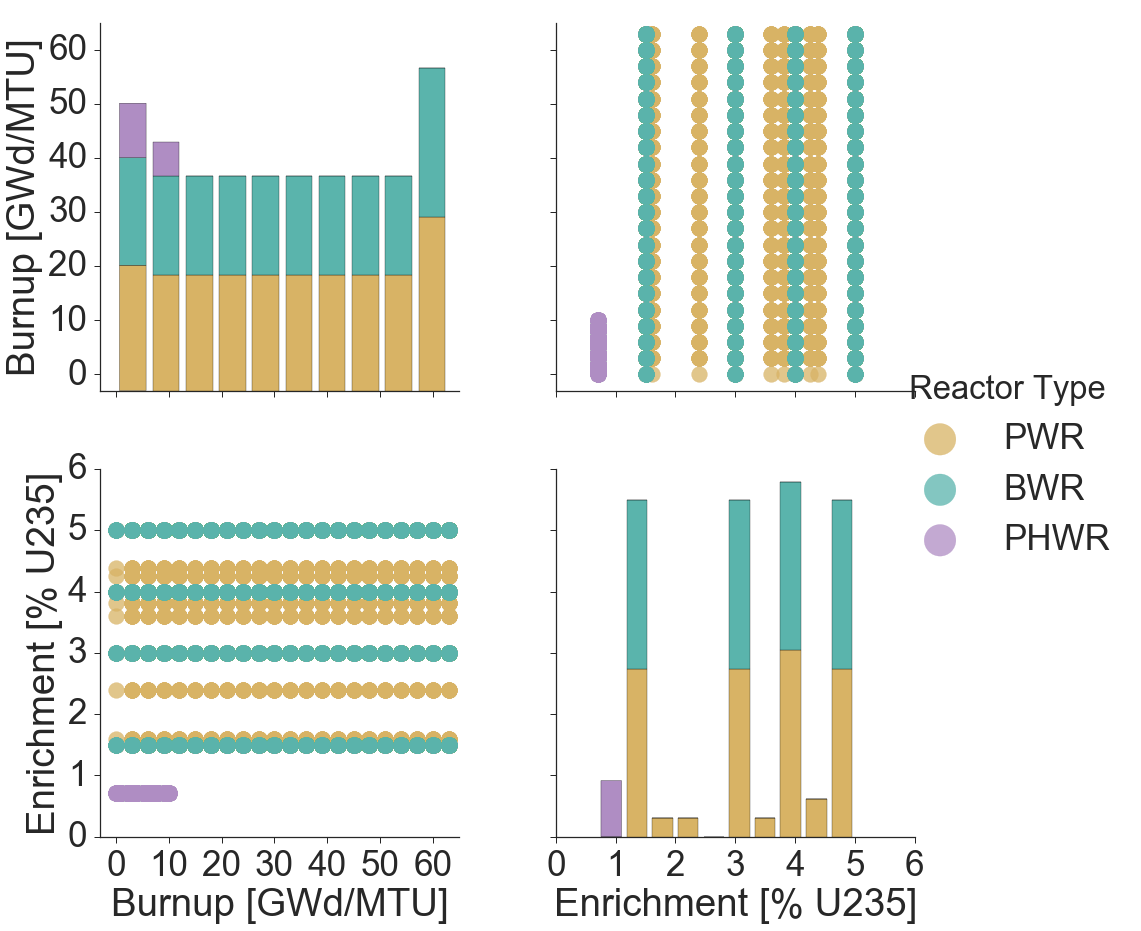

In [58]:
plt.clf()
train = trainXY[[burn_name, enr_name, rxtr_name]]
g = sns.set(style="ticks", font_scale=3.5)
g = sns.PairGrid(train, hue=rxtr_name, palette=sns.color_palette(med), 
                 diag_sharey=False, size=7)
g.map_diag(plt.hist, edgecolor="k")
g.map_offdiag(plt.scatter, s=250, alpha=0.75)
g.axes[0,0].set_ylim(-3, 65)
g.axes[1,0].set_xlim(-3, 65)
g.add_legend(markerscale=2)
new_labels = ['PWR', 'BWR', 'PHWR']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.savefig('2train_set.png', bbox_inches='tight', transparent=True)

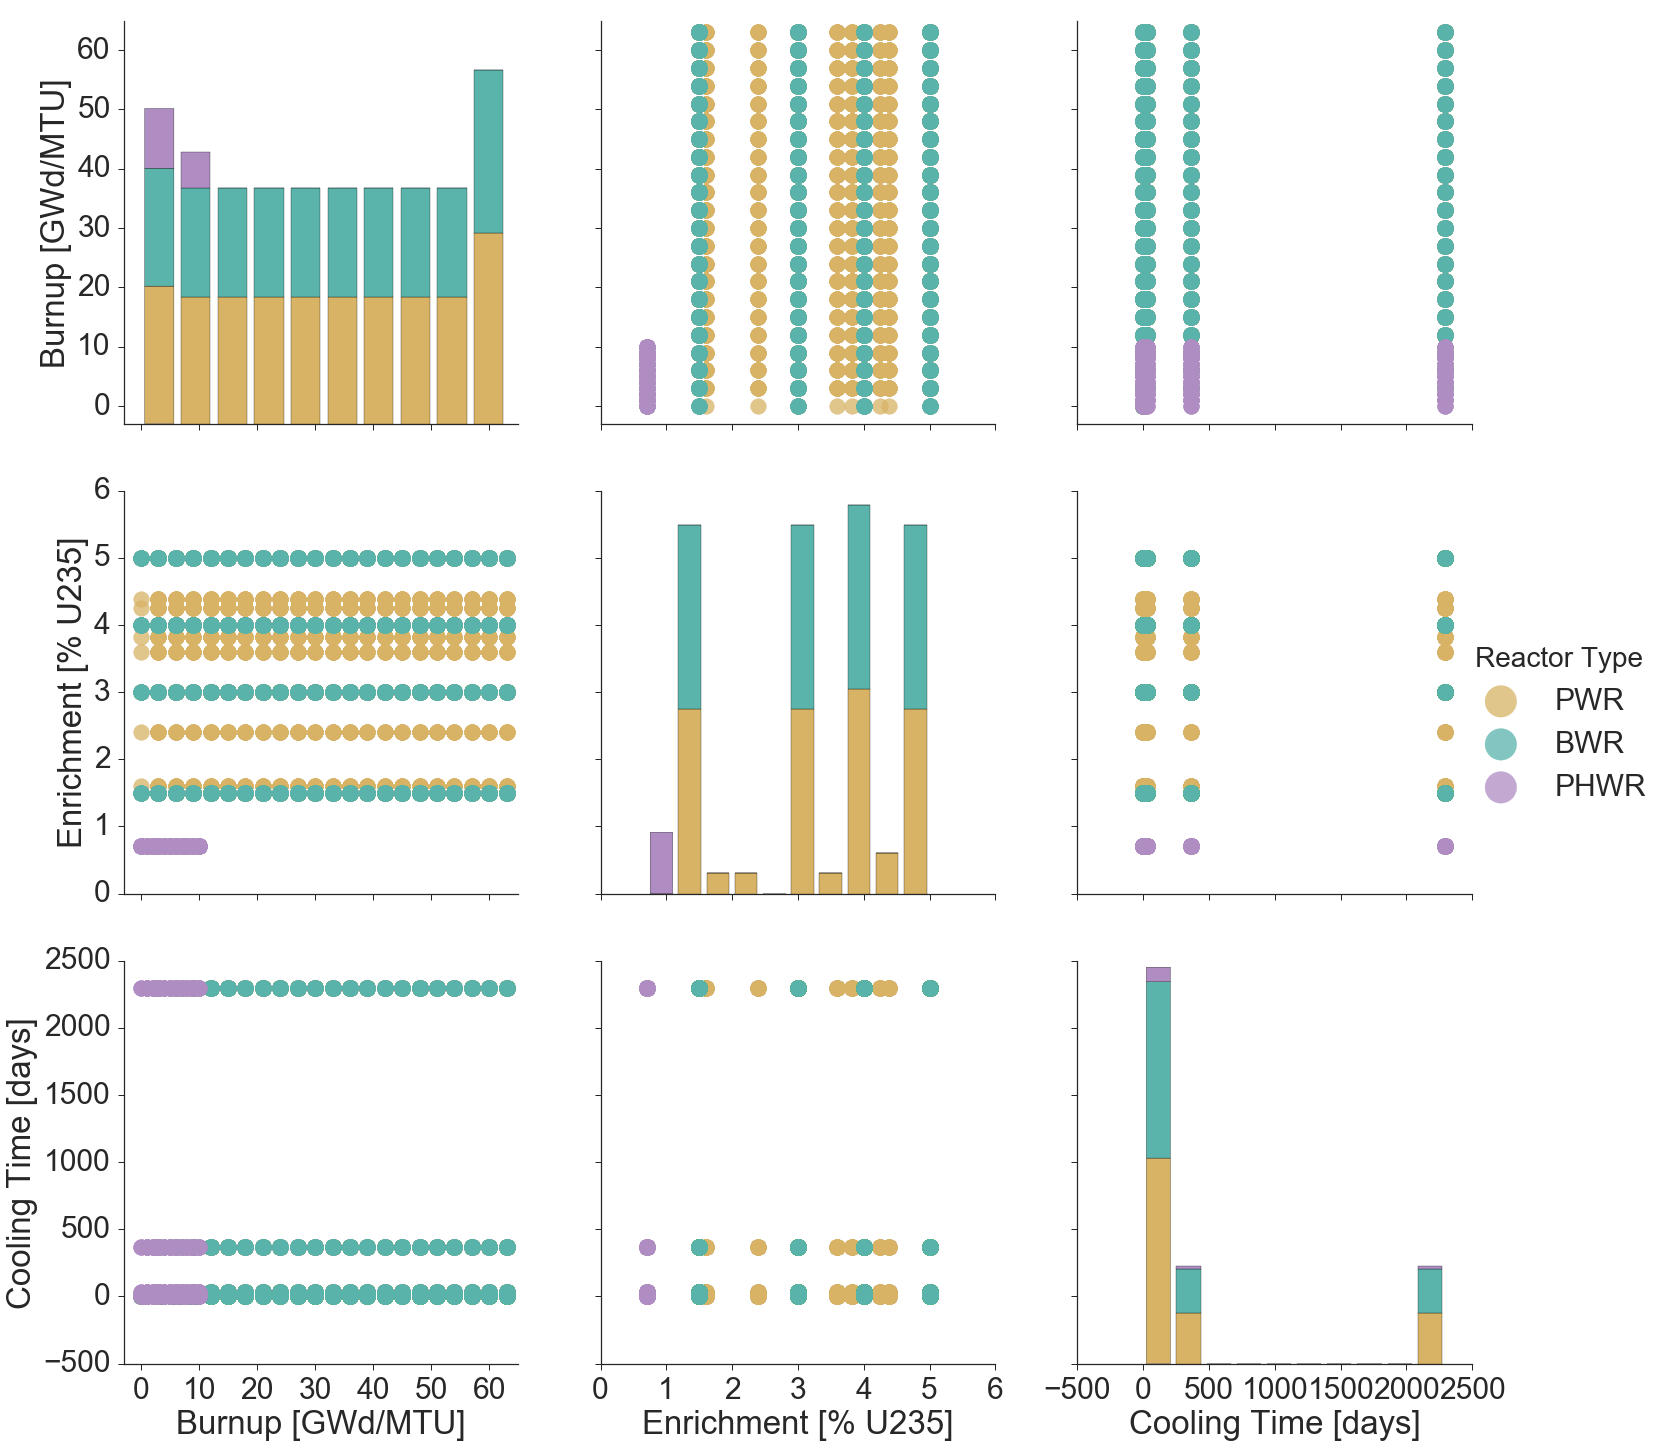

In [59]:
plt.clf()
train = trainXY[[burn_name, enr_name, rxtr_name, cool_name]]
g = sns.set(style="ticks", font_scale=3)
g = sns.PairGrid(train, hue=rxtr_name, palette=sns.color_palette(med), 
                 diag_sharey=False, size=7)
g.map_diag(plt.hist, edgecolor="k")
g.map_offdiag(plt.scatter, s=250, alpha=0.75)
g.axes[0,0].set_ylim(-3, 65)
g.axes[1,0].set_xlim(-3, 65)
g.add_legend(markerscale=2)
new_labels = ['PWR', 'BWR', 'PHWR']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

g.savefig('2train_set_allparams.png', bbox_inches='tight', transparent=True)